In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import plotly.express as px
import plotly.graph_objects as go
import catboost as cb
import lightgbm as lgbm
from sklearn.metrics import precision_score,precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [7]:
data = pd.read_csv("deep_learning_features.csv")

In [8]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0,0.013385,0.000000,0,0.146673,0.016215,0.058617,0.000000,0.082838,0.000000,...,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,1
1,1,0.013971,0.000000,0,0.152750,0.015398,0.061422,0.000000,0.084901,0.000000,...,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,1
2,2,0.011785,0.000000,0,0.141324,0.015041,0.051881,0.000000,0.074199,0.000000,...,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,1
3,3,0.008265,0.000000,0,0.098978,0.034177,0.038651,0.000000,0.080790,0.035263,...,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,1
4,4,0.000000,0.102436,0,0.065930,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,451,0.014526,0.000000,0,0.145292,0.246465,0.214864,0.000000,0.442919,0.487864,...,0.229,-0.488,-0.118015,0.083851,0.144769,-0.067698,0.233650,1.581825,-1.226706,3
2274,452,0.013551,0.000000,0,0.153460,0.015140,0.061328,0.000000,0.085542,0.000000,...,0.303,-0.569,-0.117486,0.082563,0.143595,-0.005831,0.369785,2.110106,-1.222223,3
2275,453,0.000000,0.000000,0,0.082699,0.086398,0.059115,0.000000,0.127354,0.117076,...,0.232,-0.569,-0.116743,0.084937,0.144371,-0.041197,0.247918,1.606971,-1.236654,3
2276,454,0.015868,0.000000,0,0.108013,0.106770,0.090894,0.000000,0.181956,0.144126,...,0.293,-0.771,-0.117529,0.083075,0.143924,-0.024656,0.533415,2.035792,-1.224588,3


In [9]:
X = data.drop(["Fault","Unnamed: 0"],axis=1)

In [10]:
y = data["Fault"]

In [11]:
X

,0,1,2,3,4,5,6,7,8,9,...,255,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
0,0.013385,0.000000,0,0.146673,0.016215,0.058617,0.000000,0.082838,0.000000,0.000000,...,0,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421
1,0.013971,0.000000,0,0.152750,0.015398,0.061422,0.000000,0.084901,0.000000,0.000000,...,0,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798
2,0.011785,0.000000,0,0.141324,0.015041,0.051881,0.000000,0.074199,0.000000,0.000000,...,0,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240
3,0.008265,0.000000,0,0.098978,0.034177,0.038651,0.000000,0.080790,0.035263,0.000000,...,0,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821
4,0.000000,0.102436,0,0.065930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,0.014526,0.000000,0,0.145292,0.246465,0.214864,0.000000,0.442919,0.487864,0.071318,...,0,0.229,-0.488,-0.118015,0.083851,0.144769,-0.067698,0.233650,1.581825,-1.226706
2274,0.013551,0.000000,0,0.153460,0.015140,0.061328,0.000000,0.085542,0.000000,0.000000,...,0,0.303,-0.569,-0.117486,0.082563,0.143595,-0.005831,0.369785,2.110106,-1.222223
2275,0.000000,0.000000,0,0.082699,0.086398,0.059115,0.000000,0.127354,0.117076,0.000000,...,0,0.232,-0.569,-0.116743,0.084937,0.144371,-0.041197,0.247918,1.606971,-1.236654
2276,0.015868,0.000000,0,0.108013,0.106770,0.090894,0.000000,0.181956,0.144126,0.009097,...,0,0.293,-0.771,-0.117529,0.083075,0.143924,-0.024656,0.533415,2.035792,-1.224588


In [12]:
y = pd.DataFrame(y)

In [13]:
y

,Fault
0,1
1,1
2,1
3,1
4,1
...,...
2273,3
2274,3
2275,3
2276,3


In [14]:
print(X.shape)
print(y.shape)

(2278, 265)
(2278, 1)


### Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1594, 265)
(684, 265)
(1594, 1)
(684, 1)


### Model Training & Classification

### 1.Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [20]:
logistic_model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred1 = logistic_model.predict(X_test)

In [23]:
#y_pred1

In [25]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test,y_pred1)

In [26]:
print(accuracy1)

0.8026315789473685


In [27]:
print(precision_score(y_test,y_pred1,average='weighted'))

0.8049013775722624


In [28]:
print(recall_score(y_test,y_pred1,average='weighted'))

0.8026315789473685


In [29]:
print(f1_score(y_test,y_pred1,average='weighted'))

0.8025556696418702


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test, y_pred1)

In [32]:
cm1

array([[109,   2,   0,  18],
       [ 16, 201,  24,   8],
       [  0,  42, 123,   0],
       [ 21,   4,   0, 116]], dtype=int64)

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)

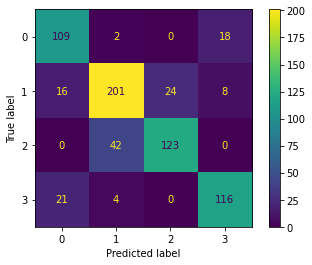

In [34]:
disp.plot()
plt.show()

In [35]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred1))


Classification Report

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       129
           1       0.81      0.81      0.81       249
           2       0.84      0.75      0.79       165
           3       0.82      0.82      0.82       141

    accuracy                           0.80       684
   macro avg       0.80      0.81      0.80       684
weighted avg       0.80      0.80      0.80       684



### 2.Naive Baye's

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb_model = GaussianNB()

In [38]:
gnb_model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [39]:
y_pred2 = gnb_model.predict(X_test)

In [40]:
accuracy2 = accuracy_score(y_test,y_pred2)
print(accuracy2)

0.6403508771929824


In [41]:
print(precision_score(y_test,y_pred2,average='weighted'))

0.646681557853689


In [42]:
print(recall_score(y_test,y_pred2,average='weighted'))

0.6403508771929824


In [43]:
print(f1_score(y_test,y_pred2,average='weighted'))

0.5917671045157877


[[114  15   0   0]
 [ 25  40 174  10]
 [  0  17 148   0]
 [  0   5   0 136]]


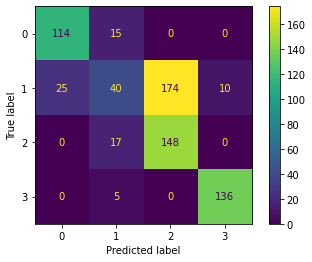


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       129
           1       0.52      0.16      0.25       249
           2       0.46      0.90      0.61       165
           3       0.93      0.96      0.95       141

    accuracy                           0.64       684
   macro avg       0.68      0.73      0.66       684
weighted avg       0.65      0.64      0.59       684



In [44]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred2))

### 3.k-Nearest Neighbors

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=4)

In [46]:
knn_model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [47]:
y_pred3 = knn_model.predict(X_test)

In [48]:
accuracy3 = accuracy_score(y_test,y_pred3)
print(accuracy3)

0.7690058479532164


In [49]:
print(precision_score(y_test,y_pred3,average='weighted'))

0.772641067329937


In [50]:
print(recall_score(y_test,y_pred3,average='weighted'))

0.7690058479532164


In [51]:
print(f1_score(y_test,y_pred3,average='weighted'))

0.7685278455509654


[[114   0   0  15]
 [ 19 186  39   5]
 [  0  49 116   0]
 [ 27   4   0 110]]


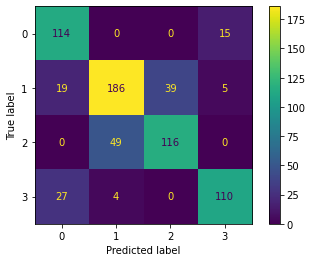


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       129
           1       0.78      0.75      0.76       249
           2       0.75      0.70      0.72       165
           3       0.85      0.78      0.81       141

    accuracy                           0.77       684
   macro avg       0.77      0.78      0.77       684
weighted avg       0.77      0.77      0.77       684



In [52]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred3))

### 4.Decision Tree

In [53]:
dtree_model = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0)

In [54]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
y_pred4 = dtree_model.predict(X_test)

In [56]:
accuracy4 = accuracy_score(y_test,y_pred4)
print(accuracy4)

0.9049707602339181


In [57]:
print(precision_score(y_test,y_pred4,average='weighted'))

0.9053251383855321


In [58]:
print(recall_score(y_test,y_pred4,average='weighted'))

0.9049707602339181


In [59]:
print(f1_score(y_test,y_pred4,average='weighted'))

0.904214434241408


[[126   3   0   0]
 [ 13 207  22   7]
 [  0  12 153   0]
 [  0   8   0 133]]


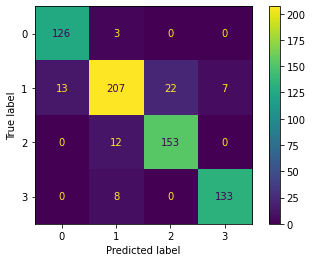


Classification Report

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       129
           1       0.90      0.83      0.86       249
           2       0.87      0.93      0.90       165
           3       0.95      0.94      0.95       141

    accuracy                           0.90       684
   macro avg       0.91      0.92      0.91       684
weighted avg       0.91      0.90      0.90       684



In [60]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred4))

### 5.Random Forest

In [61]:
rf_model = RandomForestClassifier(n_estimators=100)

In [62]:
rf_model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_77880\223814155.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [63]:
y_pred5 = rf_model.predict(X_test)

In [64]:
accuracy5 = accuracy_score(y_test,y_pred5)
print(accuracy5)

0.9269005847953217


In [65]:
print(precision_score(y_test,y_pred5,average='weighted'))

0.9279819931793617


In [66]:
print(recall_score(y_test,y_pred5,average='weighted'))

0.9269005847953217


In [67]:
print(f1_score(y_test,y_pred5,average='weighted'))

0.9259981922774202


In [68]:
param_grid = {'n_estimators': [25, 50, 100, 150],
'max_features': ['sqrt', 'log2', None],
'max_depth': [3, 6, 9],
'max_leaf_nodes': [3, 6, 9],
}


In [70]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConvers

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9)


In [71]:
rf_model1 = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9)

In [72]:
rf_model1.fit(X_train, y_train)

C:\Users\N Sai Dhanush\AppData\Local\Temp\ipykernel_77880\2979916354.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model1.fit(X_train, y_train)


RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9)

In [73]:
y_pred51 = rf_model1.predict(X_test)

In [74]:
accuracy51 = accuracy_score(y_test,y_pred51)
print(accuracy51)

0.9473684210526315


In [75]:
print(precision_score(y_test,y_pred51,average='weighted'))

0.9489634834784421


In [76]:
print(recall_score(y_test,y_pred51,average='weighted'))

0.9473684210526315


In [77]:
print(f1_score(y_test,y_pred51,average='weighted'))

0.9470191405392836


[[129   0   0   0]
 [ 14 223   3   9]
 [  0  10 155   0]
 [  0   0   0 141]]


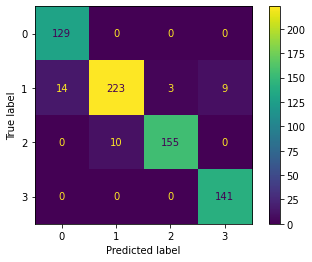


Classification Report

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       129
           1       0.96      0.90      0.93       249
           2       0.98      0.94      0.96       165
           3       0.94      1.00      0.97       141

    accuracy                           0.95       684
   macro avg       0.95      0.96      0.95       684
weighted avg       0.95      0.95      0.95       684



In [78]:
cm51 = confusion_matrix(y_test, y_pred51)
print(cm51)
disp51 = ConfusionMatrixDisplay(confusion_matrix=cm51)
disp51.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred51))

### 6.Support Vector Machines

In [79]:
svm_model = SVC(C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale')

In [80]:
svm_model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [81]:
y_pred6 = svm_model.predict(X_test)

In [82]:
accuracy6 = accuracy_score(y_test,y_pred6)
print(accuracy6)

0.5760233918128655


In [83]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid_svm, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.539 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.536 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.582 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.599 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.604 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.599 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.583 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.561 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.561 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.563 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.599 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.592 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.561 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.558 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.575 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.564 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.558 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.520 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.505 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.541 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.755 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.768 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.790 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.768 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.796 total time=   0.2s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.790 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.781 total time=   0.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.777 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.702 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.693 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.673 total time=   0.1s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.618 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.596 total time=   0.1s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.549 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.549 total time=   0.1s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.575 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.602 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.592 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.545 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.561 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.569 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.799 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.781 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.803 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.793 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.799 total time=   0.3s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.1s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.836 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.865 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.828 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.821 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.852 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.737 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.730 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.643 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.677 total time=   0.1s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.720 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.624 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.599 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.558 total time=   0.1s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.567 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.582 total time=   0.1s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.803 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.765 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.774 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.784 total time=   0.4s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.777 total time=   0.3s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.1s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.856 total time=   0.1s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.890 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.897 total time=   0.0s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.862 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.906 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.868 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.878 total time=   0.1s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.856 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.853 total time=   0.1s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.877 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.746 total time=   0.1s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.746 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.639 total time=   0.1s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.718 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.742 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.765 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.759 total time=   0.2s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.752 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.759 total time=   0.4s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.764 total time=   0.3s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.859 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.862 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.925 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.906 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.884 total time=   0.0s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.925 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.900 total time=   0.0s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.893 total time=   0.1s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.922 total time=   0.0s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.943 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.893 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.875 total time=   0.1s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.850 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.865 total time=   0.1s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.884 total time=   0.1s


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [84]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [85]:
svm_model1 = SVC(C= 1000, gamma= 0.01, kernel= 'rbf')

In [86]:
svm_model1.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, gamma=0.01)

In [87]:
y_pred61 = svm_model1.predict(X_test)

In [88]:
accuracy61 = accuracy_score(y_test,y_pred61)
print(accuracy61)

0.9195906432748538


In [89]:
print(precision_score(y_test,y_pred61,average='weighted'))

0.9203575508294638


In [90]:
print(precision_score(y_test,y_pred61,average='weighted'))

0.9203575508294638


In [91]:
print(recall_score(y_test,y_pred5,average='weighted'))

0.9269005847953217


[[129   0   0   0]
 [ 14 209  17   9]
 [  0  13 152   0]
 [  0   2   0 139]]


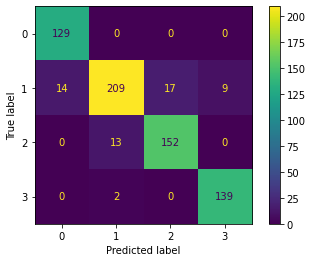


Classification Report

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       129
           1       0.93      0.84      0.88       249
           2       0.90      0.92      0.91       165
           3       0.94      0.99      0.96       141

    accuracy                           0.92       684
   macro avg       0.92      0.94      0.93       684
weighted avg       0.92      0.92      0.92       684



In [92]:
cm61 = confusion_matrix(y_test, y_pred61)
print(cm61)
disp61 = ConfusionMatrixDisplay(confusion_matrix=cm61)
disp61.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred61))

### 7.AdaBoost

In [93]:
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=0)

In [94]:
adaboost_model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [95]:
y_pred7 = adaboost_model.predict(X_test)

In [96]:
accuracy7 = accuracy_score(y_test,y_pred7)
print(accuracy7)

0.7149122807017544


In [97]:
parameters_adaboost = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [98]:
clf = GridSearchCV(adaboost_model, parameters_adaboost, cv=5)
clf.fit(X_train, y_train)


C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=100, random_state=0),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]})

In [99]:
clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.99, n_estimators=20,
                   random_state=0)

In [100]:
adaboost_model1 = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.99, n_estimators=20,random_state=0)

In [101]:
adaboost_model1.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.99, n_estimators=20,
                   random_state=0)

In [102]:
y_pred71 = adaboost_model1.predict(X_test)

In [103]:
accuracy71 = accuracy_score(y_test,y_pred71)
print(accuracy71)

0.8538011695906432


In [104]:
print(precision_score(y_test,y_pred71,average='weighted'))

0.8756512949474113


In [105]:
print(recall_score(y_test,y_pred71,average='weighted'))

0.8538011695906432


In [106]:
print(f1_score(y_test,y_pred71,average='weighted'))

0.8505209224010197


[[112  17   0   0]
 [  5 229   2  13]
 [  0  63 102   0]
 [  0   0   0 141]]


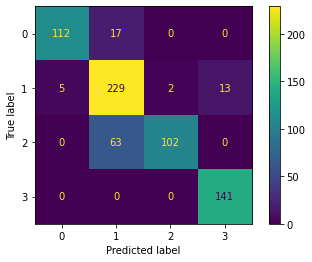


Classification Report

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       129
           1       0.74      0.92      0.82       249
           2       0.98      0.62      0.76       165
           3       0.92      1.00      0.96       141

    accuracy                           0.85       684
   macro avg       0.90      0.85      0.86       684
weighted avg       0.88      0.85      0.85       684



In [107]:
cm71 = confusion_matrix(y_test, y_pred71)
print(cm71)
disp71 = ConfusionMatrixDisplay(confusion_matrix=cm71)
disp71.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred71))

### 8.Gradient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gbc_model = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

In [110]:
gbc_model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [111]:
y_pred8 = gbc_model.predict(X_test)

In [112]:
accuracy8 = accuracy_score(y_test,y_pred8)
print(accuracy8)

0.9312865497076024


In [113]:
parameters_gbc = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [114]:
cv = GridSearchCV(gbc_model,parameters_gbc,cv=5)

In [115]:
cv.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_features=5,
                                                  n_estimators=300,
                                                  random_state=100),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [116]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=1, max_depth=1, max_features=5,
                           n_estimators=50, random_state=100)

In [117]:
gbc_model1 = GradientBoostingClassifier(learning_rate=1, max_depth=1, max_features=5,n_estimators=50, random_state=100)

In [118]:
gbc_model1.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1, max_depth=1, max_features=5,
                           n_estimators=50, random_state=100)

In [119]:
y_pred81 = gbc_model1.predict(X_test)

In [120]:
accuracy81 = accuracy_score(y_test,y_pred81)
print(accuracy81)

0.9283625730994152


In [123]:
print(precision_score(y_test,y_pred8,average='weighted'))

0.9317384055342639


In [124]:
print(recall_score(y_test,y_pred8,average='weighted'))

0.9312865497076024


In [126]:
print(f1_score(y_test,y_pred8,average='weighted'))

0.9308250689696275


[[125   4   0   0]
 [ 14 218   8   9]
 [  0  10 155   0]
 [  0   2   0 139]]


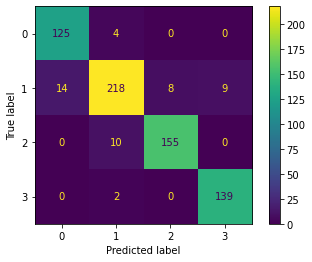


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       129
           1       0.93      0.88      0.90       249
           2       0.95      0.94      0.95       165
           3       0.94      0.99      0.96       141

    accuracy                           0.93       684
   macro avg       0.93      0.94      0.94       684
weighted avg       0.93      0.93      0.93       684



In [127]:
cm8 = confusion_matrix(y_test, y_pred8)
print(cm8)
disp8 = ConfusionMatrixDisplay(confusion_matrix=cm8)
disp8.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred8))

### 9.LightBGM

In [128]:
import lightgbm as lgb

In [129]:
lgb_model = lgb.LGBMClassifier()

In [130]:
lgb_model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

In [131]:
y_pred9 = lgb_model.predict(X_test)

In [132]:
accuracy9 = accuracy_score(y_test,y_pred9)
print(accuracy9)

0.9576023391812866


In [133]:
param_grid_lgb = {'learning_rate': [0.1, 0.01],'n_estimators': [50, 100, 150], 'max_depth': [4, 6],'colsample_bytree': [0.7, 0.8, 0.9],'subsample': [0.7, 0.8, 0.9],'min_child_samples': [1, 5, 10] }

In [134]:
estimator = lgb.LGBMClassifier(objective='multiclass', random_state=101)

In [135]:
model = GridSearchCV(estimator=estimator, param_grid=param_grid,cv=3, n_jobs=-1, scoring='accuracy')

In [136]:
model.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] num_leaves is set=31, max_leaf_nodes=3 will be ignored. Current value: num_leaves=31


GridSearchCV(cv=3,
             estimator=LGBMClassifier(objective='multiclass', random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='accuracy')

In [137]:
best_params = model.best_estimator_
print(best_params)

LGBMClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=3,
               n_estimators=25, objective='multiclass', random_state=101)


In [139]:
lgb_model1 = lgb.LGBMClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=3,n_estimators=25, objective='multiclass', random_state=101)

In [140]:
lgb_model1.fit(X_train, y_train)

C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N Sai Dhanush\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=3,
               n_estimators=25, objective='multiclass', random_state=101)

In [141]:
y_pred91 = lgb_model1.predict(X_test)

In [142]:
accuracy91 = accuracy_score(y_test,y_pred91)
print(accuracy91)

0.9605263157894737


In [143]:
print(precision_score(y_test,y_pred91,average='weighted'))

0.9610758634139408


In [144]:
print(recall_score(y_test,y_pred91,average='weighted'))

0.9605263157894737


In [145]:
print(f1_score(y_test,y_pred91,average='weighted'))

0.960348704756497


[[127   2   0   0]
 [  7 230   3   9]
 [  0   6 159   0]
 [  0   0   0 141]]


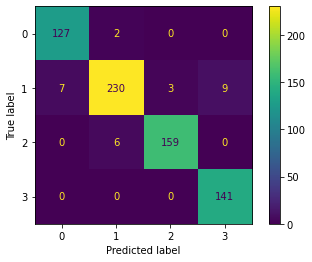


Classification Report

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       129
           1       0.97      0.92      0.94       249
           2       0.98      0.96      0.97       165
           3       0.94      1.00      0.97       141

    accuracy                           0.96       684
   macro avg       0.96      0.97      0.96       684
weighted avg       0.96      0.96      0.96       684



In [146]:
cm91 = confusion_matrix(y_test, y_pred91)
print(cm91)
disp91 = ConfusionMatrixDisplay(confusion_matrix=cm91)
disp91.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred91))

### 10.CatBoost

In [147]:
from catboost import CatBoostClassifier

In [148]:
catboost_model = CatBoostClassifier(iterations=50, learning_rate=0.1)

In [149]:
catboost_model.fit(X_train, y_train)

0:	learn: 1.2287239	total: 228ms	remaining: 11.2s
1:	learn: 1.0953759	total: 324ms	remaining: 7.79s
2:	learn: 0.9857376	total: 424ms	remaining: 6.64s
3:	learn: 0.8952146	total: 547ms	remaining: 6.29s
4:	learn: 0.8125201	total: 666ms	remaining: 6s
5:	learn: 0.7566199	total: 800ms	remaining: 5.87s
6:	learn: 0.7024247	total: 914ms	remaining: 5.62s
7:	learn: 0.6584706	total: 1.03s	remaining: 5.4s
8:	learn: 0.6038787	total: 1.18s	remaining: 5.36s
9:	learn: 0.5685415	total: 1.29s	remaining: 5.17s
10:	learn: 0.5369913	total: 1.4s	remaining: 4.96s
11:	learn: 0.5045127	total: 1.5s	remaining: 4.75s
12:	learn: 0.4753471	total: 1.61s	remaining: 4.58s
13:	learn: 0.4529499	total: 1.76s	remaining: 4.53s
14:	learn: 0.4323065	total: 1.9s	remaining: 4.42s
15:	learn: 0.4116153	total: 2.02s	remaining: 4.28s
16:	learn: 0.3924806	total: 2.13s	remaining: 4.14s
17:	learn: 0.3768626	total: 2.25s	remaining: 3.99s
18:	learn: 0.3632142	total: 2.42s	remaining: 3.95s
19:	learn: 0.3480363	total: 2.54s	remaining: 3.8

In [150]:
y_pred10 = catboost_model.predict(X_test)

In [151]:
accuracy10 = accuracy_score(y_test,y_pred10)
print(accuracy10)

0.9444444444444444


In [152]:
print(precision_score(y_test,y_pred10,average='weighted'))

0.944852950817527


In [153]:
print(recall_score(y_test,y_pred10,average='weighted'))

0.9444444444444444


In [155]:
print(f1_score(y_test,y_pred10,average='weighted'))

0.9439942367797016


[[127   2   0   0]
 [ 10 223   7   9]
 [  0  10 155   0]
 [  0   0   0 141]]


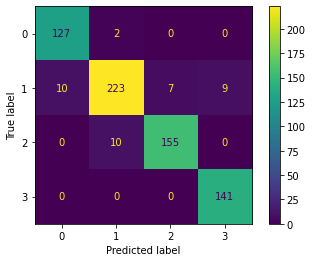


Classification Report

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       129
           1       0.95      0.90      0.92       249
           2       0.96      0.94      0.95       165
           3       0.94      1.00      0.97       141

    accuracy                           0.94       684
   macro avg       0.94      0.95      0.95       684
weighted avg       0.94      0.94      0.94       684



In [156]:
cm10 = confusion_matrix(y_test, y_pred10)
print(cm10)
disp10 = ConfusionMatrixDisplay(confusion_matrix=cm10)
disp10.plot()
plt.show()
print('\nClassification Report\n')
print(classification_report(y_test, y_pred10))